# Project: Wrangling and Analyze Data

Done by: Nouf AlGhamdi

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
import matplotlib.pyplot as plt
#import plotly.express as px

In [4]:
import pandas as pd
import numpy as np
import tweepy 
import json 
%matplotlib inline

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [7]:
import requests

# 1st step ----- Send a request with the downloaded url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url) 

# 2nd step ----- write file content from requests response to corresponding file
open("image-predictions.tsv", "wb").write(response.content);

# 3rd step ----- Read the TSV file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t' )

In [8]:
image_predictions.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1564,793614319594401792,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,golden_retriever,0.705092,True,Labrador_retriever,0.219721,True,kuvasz,0.015965,True
1080,718234618122661888,https://pbs.twimg.com/media/CfeukpmW4AEGjOE.jpg,1,malamute,0.370152,True,Siberian_husky,0.356398,True,Eskimo_dog,0.271042,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

Resources used in ths part:
1. https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
2. https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

In [ ]:

#.  ---------------  The First Approach ---------------

# Note to the instructor: kindly don't run this code.

# I prepared this code to gather the data from Twitter API with my own generated API keys,
#   unfortunately.. I didn't recive any response (email) from Twitter team.
#   I waited for about 36 hours, then I decided to go with the another method that Udacity provided to us. 

# Note: I did create a developer account and applied the application as it was explained in the (5. Additional Resource: Twitter API) section


import tweepy
from tweepy import OAuthHandler
import json
import os

CONSUMER_KEY = "CONSUMER_KEY"
CONSUMER_SECRET = "CONSUMER_SECRET"
ACCESS_TOKEN = "ACCESS_TOKEN"
ACCESS_TOKEN_SECRET = "ACCESS_TOKEN_SECRET"

# Authenticate the Twitter API(Tweepy)
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

unretrieved_tweetIDs = []
tweet_IDs = twitter_archive.tweet_id.values
      
with open(os.path.join(os.getcwd(), 'tweet_json.txt'), mode= 'w') as file:
    for tweet_id in tweet_IDs:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended') #tweet_mode = "extended" to retrieve the full text
            file.write(json.dump(tweet._json)+ '\n')
        except:
            print('Oops! couldn\'t fine the tweet!')
            unretrieved_tweetIDs.append(tweet_id)

print('Finished retreving tweets!')


In [ ]:

#.  ---------------  The Second Approach ---------------
# Note to the instructor: kindly don't run this code.


import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


###### All Faild (because of the API keys unavailability)

In [9]:

# reading the tweet_json.txt file line by line into a pandas DataFrame with tweet ID, retweet count, and 
#  favorite count, followers count, friends count:

tweet_ID = []
favs = []
retweets = []
followers = []
friends = []
full_text = []

with open('tweet_json.txt', mode = 'r') as f:
    for each_line in f.readlines():
        tweet_data = json.loads(each_line)
        tweet_ID.append(tweet_data['id'])
        favs.append(tweet_data['favorite_count'])
        retweets.append(tweet_data['retweet_count'])
        followers.append(tweet_data['user']['followers_count']) #############
        friends.append(tweet_data['user']['friends_count']) ##############
        full_text.append(tweet_data['full_text'])
        
tweet_detailed_data = pd.DataFrame({'tweet_id':tweet_ID, 'favorite_count':favs,'retweet_count':retweets,
                                     'followers_count':followers, 'friends_count':friends, 'full_text':full_text })       




In [10]:
tweet_detailed_data.head() # the first 5 records of the dataframe I have created. 

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,full_text
0,892420643555336193,39467,8853,3200889,104,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,33819,6514,3200889,104,This is Tilly. She's just checking pup on you....
2,891815181378084864,25461,4328,3200889,104,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,42908,8964,3200889,104,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,41048,9774,3200889,104,This is Franklin. He would like you to stop ca...


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## 1. Visual Assessement

In [11]:

twitter_archive.to_excel("twitter_archive.xlsx")  # save twitter_archive to an excel file to Assess it visually
image_predictions.to_excel("image_predictions.xlsx")  # save image_predictions to an excel file to Assess it visually 


## 2. programmatic Assessement
### 1. twitter_archive dataset:

In [12]:
#.     --------   (1)   --------
twitter_archive.columns #print all the indicators

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [13]:
#.     --------   (2)   --------
twitter_archive.info() # prints concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
#.     --------   (3)   --------
twitter_archive.shape  # return a tuple with the lengths of the corresponding array dimensions.

(2356, 17)

### Note:
 
This dataset has 2356 Observations, and 17 Variables.

In [15]:
#.     --------   (4)   --------
# check how many NaN values and in which columns and converted to Ratio
percent_missing = round(twitter_archive.isnull().sum() * 100 / len(twitter_archive),2)
print("Variables Missing Ratio:")
print(percent_missing)

Variables Missing Ratio:
tweet_id                       0.00
in_reply_to_status_id         96.69
in_reply_to_user_id           96.69
timestamp                      0.00
source                         0.00
text                           0.00
retweeted_status_id           92.32
retweeted_status_user_id      92.32
retweeted_status_timestamp    92.32
expanded_urls                  2.50
rating_numerator               0.00
rating_denominator             0.00
name                           0.00
doggo                          0.00
floofer                        0.00
pupper                         0.00
puppo                          0.00
dtype: float64


### Note:

Looking at the result above, we clearly can see the __[in_reply_to_status_id, in_reply_to_user_id]__ columns has approximately 97% null values which is a huge amount, wherefore these columns will be dropped since its not necessary.

Likewise the __[retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp]__ these columns eually have approximately  92% null values therefore it will also be droped.

In [16]:
#.     --------   (5)   --------
twitter_archive[twitter_archive.duplicated()] # find the duplicate rows

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Note:
No duplicated rows in this dataset

In [17]:
#.     --------   (6)   --------
twitter_archive["name"].value_counts() # counts of unique values in names column


None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Lola           10
Penny          10
Tucker         10
Bo              9
Winston         9
Sadie           8
the             8
Daisy           7
Buddy           7
an              7
Bailey          7
Toby            7
Stanley         6
Leo             6
Dave            6
Jack            6
Rusty           6
Oscar           6
Koda            6
Scout           6
Bella           6
Jax             6
Milo            6
Chester         5
             ... 
Ralf            1
Kallie          1
this            1
Bloo            1
Tedders         1
Sprout          1
Edd             1
Wiggles         1
Clarkus         1
Filup           1
Arnold          1
Jeffrie         1
officially      1
Remy            1
Stark           1
Meera           1
Tiger           1
Ben             1
Sage            1
Kellogg         1
Chef            1
Geoff           1
Ralphie         1
Goliath         1
Snicku    

### Note:

As you can see from the result above that "None" is the most frequent value in the names of dogs column,
then comes "a", which doesn't make a sense as a dog name. </br> __(That could be due to inaccurate data transmission from the original tweet)__

In [18]:
# This leads me to investigate further the other names that may be inaccurate due to data transmission errors.
twitter_archive[twitter_archive['name'].str.islower()]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [19]:
#.     --------   (7)   --------
twitter_archive["rating_numerator"].value_counts() # counts of unique values in rating_numerator column


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Note:

The first letter of a dog name must be capitalized, therefore these names listed above probably aren't real dog names and should be dropped (cleaned)

In [20]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


### Note:

Some __fractions numerators__ in the source data seems to be preserved when exporting the data
___

In [21]:
#.     --------   (8)   --------
# Multi-Class dog stages

# dogs that are both doggo and pupper
twitter_archive[(twitter_archive.doggo == "doggo") & (twitter_archive.pupper == "pupper")].shape

(12, 17)

In [22]:
twitter_archive.doggo[(twitter_archive.doggo.str.contains ('doggo')) & (twitter_archive.pupper.str.contains ('pupper'))].count()


12

In [23]:
# dogs that are both doggo and puppo
twitter_archive[(twitter_archive.doggo == "doggo") & (twitter_archive.puppo == "puppo")].shape

(1, 17)

In [24]:
twitter_archive.doggo[(twitter_archive.doggo.str.contains ('doggo')) & (twitter_archive.puppo.str.contains ('puppo'))].count()


1

In [25]:
# dogs that are both doggo and floofer
twitter_archive[(twitter_archive.doggo == "doggo") & (twitter_archive.floofer == "floofer")].shape

(1, 17)

In [26]:
twitter_archive.doggo[(twitter_archive.doggo.str.contains ('doggo')) & (twitter_archive.floofer.str.contains ('floofer'))].count()


1

### 2. twitter API dataset:

In [27]:
#.     --------   (1)   --------
tweet_detailed_data.columns #print all the indicators

Index(['tweet_id', 'favorite_count', 'retweet_count', 'followers_count',
       'friends_count', 'full_text'],
      dtype='object')

In [28]:
#.     --------   (2)   --------
tweet_detailed_data[tweet_detailed_data.duplicated()] # find the duplicate rows

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,full_text


In [29]:
#.     --------   (3)   --------
tweet_detailed_data.info() # prints concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id           2354 non-null int64
favorite_count     2354 non-null int64
retweet_count      2354 non-null int64
followers_count    2354 non-null int64
friends_count      2354 non-null int64
full_text          2354 non-null object
dtypes: int64(5), object(1)
memory usage: 110.4+ KB


In [30]:
tweet_detailed_data.head(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,full_text
0,892420643555336193,39467,8853,3200889,104,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,33819,6514,3200889,104,This is Tilly. She's just checking pup on you....
2,891815181378084864,25461,4328,3200889,104,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,42908,8964,3200889,104,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,41048,9774,3200889,104,This is Franklin. He would like you to stop ca...
5,891087950875897856,20562,3261,3200889,104,Here we have a majestic great white breaching ...
6,890971913173991426,12041,2158,3200889,104,Meet Jax. He enjoys ice cream so much he gets ...
7,890729181411237888,56848,16716,3200889,104,When you watch your owner call another dog a g...
8,890609185150312448,28226,4429,3200889,104,This is Zoey. She doesn't want to be one of th...
9,890240255349198849,32467,7711,3200889,104,This is Cassie. She is a college pup. Studying...


### Note:

I noticed that all the records in the followers_count column has the same exact value, which is illogical.
Same problem with the friends_count column, for this reason these two columns will be droped.

(Originally added in order to see the correlation between the number of followers and the number of retweets or favorites)

### 2. image_predictions dataset:

In [31]:
#.     --------   (1)   --------
# find the duplicate jpg_url images 
image_predictions.jpg_url.duplicated().sum()

66

In [32]:
#.     --------   (2)   --------
image_predictions.info() # prints concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


_____

### Quality issues:
#### twitter_archive dataset:
- Quality issue (1): Columns with a high percentage of missing data
- Quality issue (2): There is duplicate data in this dataset due to retweets columns such as: 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'
- Tidiness issue (3): Change timestamp column data type into datetime rather than object.
- Quality issue (4): Re-format HTML tags in the 'source' column
- Quality issue (5): Inaccurate dog names.
- Quality issue (6): Decimal numerators should be corrected



#### tweet_detailed_data dataset:
- Quality issue (7): Drop unuseful columns such as 'followers_count', 'friends_count'
- Tidiness issue (8): Convert tweet_id column type to str instead of int64


#### image_predictions dataset:
- Quality issue (9): Drop duplicated images in the 'jpg_url' column
- Tidiness issue (10): Convert tweet_id column type to str instead of int64



### Tidiness issues

- Tidiness issue (1): Transpose dog stages (doggo, floofer, pupper, puppo) into a single column called dog_stage. 
- Tidiness issue (2): Transpose dog stages (p1_dog, p2_dog, p3_dog) into a single column called dog_breed. 
- Tidiness issue (3): Use inner and right merge to compine all three difirent dataframes to a single one
- Tidiness issue (4): remove duplicated columns after merging the dataframes 


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
tweet_detailed_data_copy = tweet_detailed_data.copy()

### Quality Issue #1:

#### Define: Drop Columns with a high percentage of missing data + unwanted columns

#### Code

In [34]:
twitter_archive_copy = twitter_archive_copy.drop(['in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'expanded_urls'], 1)

#### Test

In [35]:
twitter_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Quality Issue #2:

#### Define: There is duplicate data in this dataset due to retweets columns such as: 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'

#### Code

In [36]:
twitter_archive_copy = twitter_archive_copy.drop(['retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp'], 1)

#### Test

In [37]:
twitter_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Quality Issue #3:

#### Define: Change timestamp column data type into datetime rather than object.

#### Code

In [38]:
#    ------------- 1st Step: Convert timestamp to datetime
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])

#    ------------- 2nd Step: Extract year, month and day to new columns
twitter_archive_copy['year'] = twitter_archive_copy['timestamp'].dt.year
twitter_archive_copy['month'] = twitter_archive_copy['timestamp'].dt.month
twitter_archive_copy['day'] = twitter_archive_copy['timestamp'].dt.day

#    ------------- 3rd Step: Drop timestamp column
twitter_archive_copy = twitter_archive_copy.drop('timestamp', 1)

#### Test

In [39]:
twitter_archive_copy.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'year', 'month', 'day'],
      dtype='object')

### Quality Issue #4:

#### Define: Re-format HTML tags in the 'source' column

#### Code

In [40]:
#   ------   1st Step: Get all the types of sources with unique() method
list(twitter_archive_copy.source.unique())


['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

In [41]:
# ------ 2nd Step: Replace the sources with more simple understandable ones
twitter_archive_copy['source'] = twitter_archive_copy.source.str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', 
                                                                       expand = True)[4];


#### Test

In [42]:
list(twitter_archive_copy['source'].unique())

['Twitter for iPhone',
 'Twitter Web Client',
 'Vine - Make a Scene',
 'TweetDeck']

### Quality Issue #5:

#### Define: Inaccurate dog names.

#### Code

In [43]:
#    ------------- 1st Step: Find all incorrect names and change it to "Unknown"
twitter_archive_copy.loc[twitter_archive_copy['name'].str.islower() == True, 'name'] = "Unknown"


#### Test

In [44]:
twitter_archive_copy[twitter_archive_copy['name'].str.islower()]['name'].unique()

array([], dtype=object)

In [45]:
twitter_archive_copy['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Unknown', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Be

### Quality Issue #6:

#### Define: Decimal numerators should be re-trasform

#### Code

In [46]:
#    ------------- 1st Step: Convert 'rating_numerator' and  to rating_denominator as float data type
twitter_archive_copy[['rating_numerator', 'rating_denominator']] = twitter_archive_copy[['rating_numerator','rating_denominator']].astype(float)

# convert 'tweet_id' to str data type
twitter_archive_copy[['tweet_id']] = twitter_archive_copy[['tweet_id']].astype(str) 

twitter_archive_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
year                  2356 non-null int64
month                 2356 non-null int64
day                   2356 non-null int64
dtypes: float64(2), int64(3), object(8)
memory usage: 239.4+ KB


In [47]:

# ------ 2nd Step: Find the 'tweet_id' of all the tweets that has rating_numerator error:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_copy[twitter_archive_copy['text'].str.contains(r"(\d+\.\d+/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.0,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


In [48]:

# ------ 3rd Step: Store 'tweet_id's in a list:
rating_numerator_err = ['883482846933004288','832215909146226688','786709082849828864', '778027034220126208',
                   '681340665377193984','680494726643068929']
    

In [49]:
#twitter_archive_copy.text[twitter_archive_copy.tweet_id == '832215909146226688'].iloc[0]

In [50]:
#twitter_archive_copy.loc[twitter_archive_copy.tweet_id == '832215909146226688', 'text'].iloc[0]

In [51]:

# ------ 3rd Step: create a for loop to seach out the decimal rating number from the text column, then replace it to 'rating_numerator'
import re
for each_id in rating_numerator_err:
    text = twitter_archive_copy.text[twitter_archive_copy.tweet_id == each_id].iloc[0]
    rating_numerator =  re.search(pattern = r"(\d+\.\d+)", string = text)
    twitter_archive_copy.loc[twitter_archive_copy.tweet_id == each_id, 'rating_numerator'] = rating_numerator.group()

        
        

#### Test

In [52]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_copy[twitter_archive_copy['text'].str.contains(r"(\d+\.\d+/)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5,10.0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.5,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


### Quality Issue #7:

#### Define: Drop unuseful columns such as 'followers_count', 'friends_count'
These 2 columns contain the same values in each, so it's useful for us

#### Code

In [53]:
tweet_detailed_data_copy = tweet_detailed_data_copy.drop(['followers_count',
                                                    'friends_count'], 1)

#### Test

In [54]:
list(tweet_detailed_data_copy.columns)

['tweet_id', 'favorite_count', 'retweet_count', 'full_text']

### Quality Issue #8: 

#### Define: Convert tweet_id column type to str instead of int64 ( Image predictions dataset )

#### Code

In [55]:
image_predictions_copy[['tweet_id']] = image_predictions_copy[['tweet_id']].astype(str) 


#### Test

In [56]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Quality Issue #9:

#### Define:  Drop duplicated images in the 'jpg_url' column
'jpg_url' column contains 66 duplicated images that should be removed.

#### Code

In [57]:

image_predictions_copy = image_predictions_copy.drop_duplicates(subset=['jpg_url'], keep='last')


#### Test

In [58]:
sum(image_predictions_copy['jpg_url'].duplicated())

0

### Quality Issue #10: 

#### Define: Convert tweet_id column type to str instead of int64 ( Twitter API Dataset )

#### Code

In [59]:
tweet_detailed_data_copy[['tweet_id']] = tweet_detailed_data_copy[['tweet_id']].astype(str) 

#### Test

In [60]:
tweet_detailed_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
full_text         2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


### Quality Issue #11: 

#### Define: Format dog breed (p1, p2, p3) data  + Remove unwanted underscores 
some values in these columns in lower cases, and in order to make the data more understandable, the undersoures must be removed

#### Code

In [61]:

image_predictions_copy['p1'] = image_predictions_copy.p1.str.title()
image_predictions_copy['p2'] = image_predictions_copy.p2.str.title()
image_predictions_copy['p3'] = image_predictions_copy.p3.str.title()


image_predictions_copy['p1'] = image_predictions_copy.p1.str.replace('_',' ')
image_predictions_copy['p2'] = image_predictions_copy.p2.str.replace('_',' ')
image_predictions_copy['p3'] = image_predictions_copy.p3.str.replace('_',' ')

#### Test

In [62]:
image_predictions_copy[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman


-----

### Tidiness issue #1:

#### Define: Transpose dog stages (doggo, floofer, pupper, puppo) into a single column, dog_stage.

#### Code

In [63]:
twitter_archive_copy.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10.0,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10.0,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10.0,Archie,None,None,None,None,2017,7,31
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10.0,Darla,None,None,None,None,2017,7,30
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10.0,Franklin,None,None,None,None,2017,7,29


In [64]:
#   ----- 1st Step: Replacing all 'None' values in the four dog stage columns with null values (to make it easier to deal with later).
twitter_archive_copy['doggo'].replace('None', np.nan, inplace=True)
twitter_archive_copy['floofer'].replace('None', np.nan, inplace=True)
twitter_archive_copy['pupper'].replace('None', np.nan, inplace=True)
twitter_archive_copy['puppo'].replace('None', np.nan, inplace=True)


In [65]:
#   ----- 2nd Step: Create a new column named 'dog_stage', then using DataFrame stack() and groupby function to join all stages into one column

stages = ['doggo','floofer','pupper','puppo'] 
twitter_archive_copy['dog_stage'] = twitter_archive_copy[stages].stack().groupby(level=0).agg('|'.join)



#### Test

In [66]:
twitter_archive_copy.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo|puppo',
       'doggo|floofer', 'doggo|pupper'], dtype=object)

In [67]:
twitter_archive_copy.dog_stage.value_counts()

pupper           245
doggo             83
puppo             29
doggo|pupper      12
floofer            9
doggo|puppo        1
doggo|floofer      1
Name: dog_stage, dtype: int64

In [68]:
# this is to test our previus work, Tweet with 'floofer' dog stage must be 10 (9 tweets with only floofer stage + 1 with doggo|floofer stages )
twitter_archive_copy.floofer.value_counts() 


floofer    10
Name: floofer, dtype: int64

In [69]:
#   ----- 3rd Step: Last step is to drop 'doggo', 'puppo', 'pupper', 'floofer' columns (unneeded anymore)
twitter_archive_copy.drop(columns=['doggo', 'puppo', 'pupper', 'floofer'], inplace=True)


In [70]:
twitter_archive_copy.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'year', 'month', 'day', 'dog_stage'],
      dtype='object')

### Tidiness issue #2:

#### Define: Transpose dog stages (p1_dog, p2_dog, p3_dog) into a single column called dog_breed.

#### Code

In [71]:
image_predictions_copy['dog_breed'] = 'None'

for i, row in image_predictions_copy.iterrows():
    if row.p1_dog:
        image_predictions_copy.set_value(i, 'dog_breed', row.p1)
    elif row.p2_dog:
        image_predictions_copy.set_value(i, 'dog_breed', row.p2)
    elif row.p3_dog:
        image_predictions_copy.set_value(i, 'dog_breed', row.p3)
    else:
        image_predictions_copy.set_value(i, 'dog_breed', 'None')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [72]:
image_predictions_copy.dog_breed.value_counts()

None                              318
Golden Retriever                  158
Labrador Retriever                108
Pembroke                           95
Chihuahua                          91
Pug                                63
Toy Poodle                         51
Chow                               48
Pomeranian                         42
Samoyed                            42
Malamute                           33
Chesapeake Bay Retriever           31
French Bulldog                     31
Cocker Spaniel                     30
Miniature Pinscher                 25
Eskimo Dog                         22
Staffordshire Bullterrier          21
Cardigan                           21
German Shepherd                    21
Siberian Husky                     20
Shih-Tzu                           20
Beagle                             20
Maltese Dog                        19
Shetland Sheepdog                  19
Kuvasz                             19
Rottweiler                         19
Lakeland Ter

### Tidiness issue #2:  Merging all three datasets

#### Define:  Merging all three datasets to a tidy/cleaned one
Use inner merges to combine all dataframes to a cleaned/tidy one

#### Code

In [73]:
# Keep only tweets from (twitter_archive) that has maching 'tweet_id' in (image_predictions) datasets
merged_dataset = pd.merge(twitter_archive_copy, image_predictions_copy, how='inner', on=['tweet_id'])


#### Test

In [74]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 22 columns):
tweet_id              2009 non-null object
source                2009 non-null object
text                  2009 non-null object
rating_numerator      2009 non-null object
rating_denominator    2009 non-null float64
name                  2009 non-null object
year                  2009 non-null int64
month                 2009 non-null int64
day                   2009 non-null int64
dog_stage             310 non-null object
jpg_url               2009 non-null object
img_num               2009 non-null int64
p1                    2009 non-null object
p1_conf               2009 non-null float64
p1_dog                2009 non-null bool
p2                    2009 non-null object
p2_conf               2009 non-null float64
p2_dog                2009 non-null bool
p3                    2009 non-null object
p3_conf               2009 non-null float64
p3_dog                2009 non-null bo

In [75]:
merged_dataset = pd.merge(merged_dataset, tweet_detailed_data_copy, how='inner', on=['tweet_id'])


In [76]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 2006
Data columns (total 25 columns):
tweet_id              2007 non-null object
source                2007 non-null object
text                  2007 non-null object
rating_numerator      2007 non-null object
rating_denominator    2007 non-null float64
name                  2007 non-null object
year                  2007 non-null int64
month                 2007 non-null int64
day                   2007 non-null int64
dog_stage             309 non-null object
jpg_url               2007 non-null object
img_num               2007 non-null int64
p1                    2007 non-null object
p1_conf               2007 non-null float64
p1_dog                2007 non-null bool
p2                    2007 non-null object
p2_conf               2007 non-null float64
p2_dog                2007 non-null bool
p3                    2007 non-null object
p3_conf               2007 non-null float64
p3_dog                2007 non-null bo

### Tidiness issue #3: Drop 'full_text' column

#### Define:  'full_text' column must be removed since 'text' column from twitter_archive dataset is there
we must remove duplicated columns after merging all dataframes

#### Code

In [77]:
merged_dataset = merged_dataset.drop('full_text', 1)

#### Test

In [78]:
merged_dataset.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'year', 'month', 'day', 'dog_stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_breed', 'favorite_count', 'retweet_count'],
      dtype='object')

In [79]:
merged_dataset.tweet_id.duplicated().sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [80]:
merged_dataset.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [81]:
df = pd.read_csv('./twitter_archive_master.csv')
df.head()


,tweet_id,source,text,rating_numerator,rating_denominator,name,year,month,day,dog_stage,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,favorite_count,retweet_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,2017,8,1,NaN,...,False,Bagel,0.085851,False,Banana,0.076110,False,None,39467,8853
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017,8,1,NaN,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,Chihuahua,33819,6514
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017,7,31,NaN,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,Chihuahua,25461,4328
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017,7,30,NaN,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,Labrador Retriever,42908,8964
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017,7,29,NaN,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,Basset,41048,9774


### Insights and Visualization
1. What are the most common dog names?

2. Which dog breads has the most likes?

3. Months with the most engaging rate in 2017 (based on the number of retweets)?¶

4. The Percentage of Dog Stages in WeRateDogs

5. The Percentage of Different Sources of the Tweets at WeRateDogs


#### Insight (1) : What are the most common dog names?

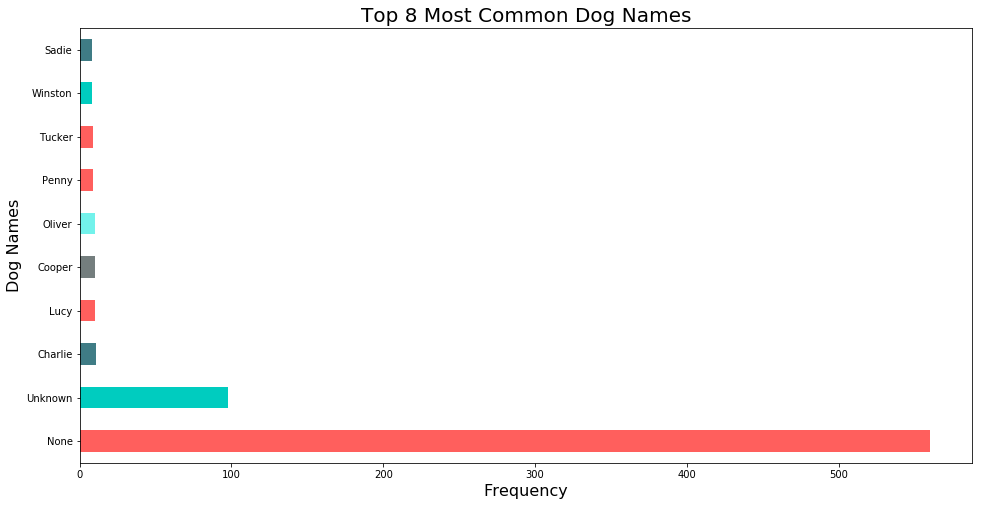

In [93]:

#  - - - - Insight(1) : Retrive the dog names from 'name' column and Select the top 10 names by most frequncies.


#Plot of the Top 8 Most common dog names:

top_dog_names_plot = df['name'].value_counts().sort_values(ascending=False).head(10)
top_dog_names_plot.plot(kind = "barh", figsize = (16, 8),color = ['#FF5F5D',"#00CCBF","#3F7C85",'#FF5F5D','#747E7E' ,"#72F2EB"]  )
plt.title("Top 8 Most Common Dog Names", fontsize =20)
plt.xlabel("Frequency", fontsize = 16)
plt.ylabel("Dog Names", fontsize = 16)
plt.show()

##### Note: As we can see from the plot above: Charlie is the most common dog name in the dataset we have, next comes Lucy, then Copper
        

#### Insight (2) : Which dog breads has the most likes?

In [89]:

#  - - - - Insight(2) : Retrive the dog breesa and sorted by the top liked ones 
most_liked_dog_breed = df.groupby('dog_breed')['favorite_count'].sum().reset_index(name = "most_liked_dogbreed")
most_liked_dog_breed = most_liked_dog_breed.sort_values('most_liked_dogbreed',ascending=False).head(10) # get the 10 highest budgets of gebres
most_liked_dog_breed

,dog_breed,most_liked_dogbreed
74,None,2006510
45,Golden Retriever,1633380
62,Labrador Retriever,1104066
81,Pembroke,969613
27,Chihuahua,569888
41,French Bulldog,515823
89,Samoyed,472290
28,Chow,409326
83,Pug,349437
104,Toy Poodle,331377


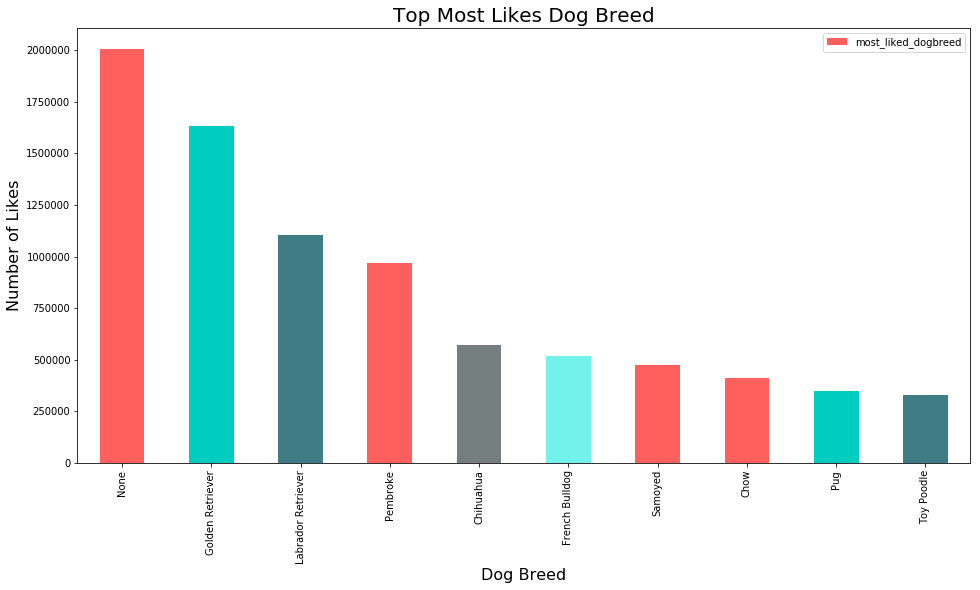

In [94]:

most_liked_dog_breed.plot(x='dog_breed',y='most_liked_dogbreed', kind = "bar", figsize = (16, 8),color = ['#FF5F5D',"#00CCBF","#3F7C85",'#FF5F5D','#747E7E' ,"#72F2EB"]  )
plt.title("Top Most Likes Dog Breed", fontsize =20)
plt.xlabel("Dog Breed", fontsize = 16)
plt.ylabel("Number of Likes", fontsize = 16)
plt.show()

##### Note: The table above indicates that Golden Retrievers are the most popular dog breed in this Twitter account, followed by Labrador Retrievers, then Pembroke Welsh Corgis.


#### Insight (3) : Months with the most engaging rate in 2017 (based on the number of retweets)? 

In [84]:

engaging_per_month_2017 = df.loc[df['year'] == 2017]
engaging_per_month_2017 = df.groupby(['month'])['retweet_count'].sum().reset_index(name = "engaging_per_month_2017")
engaging_per_month_2017 = engaging_per_month_2017.sort_values(['month'],ascending=True).head(10) # get the 10 highest budgets of gebres
engaging_per_month_2017


,month,engaging_per_month_2017
0,1,680449
1,2,432443
2,3,468404
3,4,331193
4,5,444467
5,6,599325
6,7,614060
7,8,239677
8,9,259646
9,10,247712


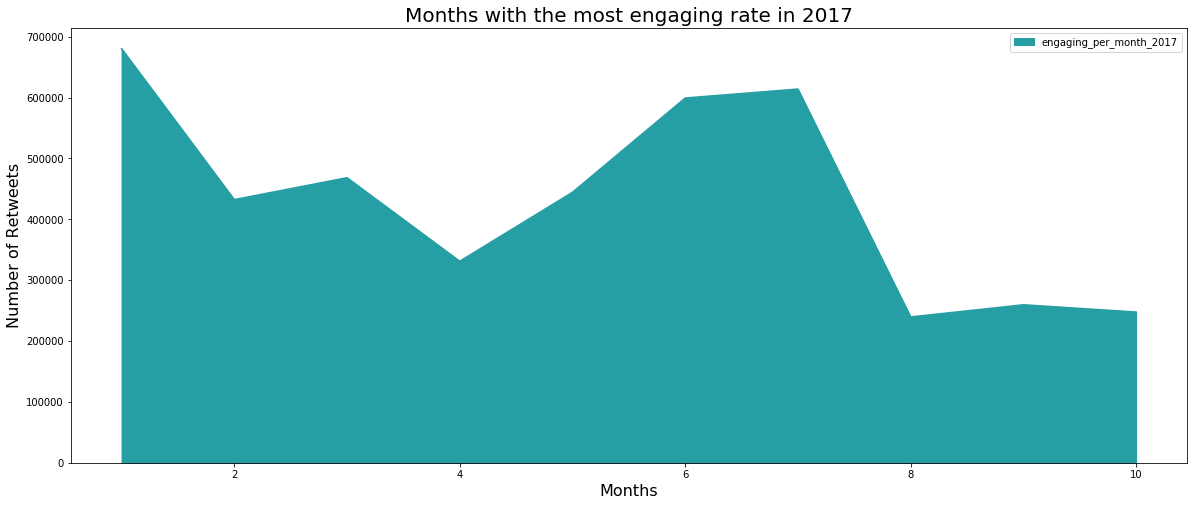

In [95]:
#      A R E A   P L O T :
engaging_per_month_2017.plot(x='month' ,y = "engaging_per_month_2017", kind = "area", figsize = (20, 8),color = ["#259EA4"])
plt.title("Months with the most engaging rate in 2017", fontsize =20)
plt.ylabel("Number of Retweets", fontsize = 16)
plt.xlabel("Months", fontsize = 16)
plt.show()

##### Note: As can be seen in the graph above, the highest engagement rate in 2017 occurred in the first month of that year, then started to decline sharply, then began to rise again in the fourth month, reaching its second highest point in the seventh month.

#### Insight (4) :  The Percentage of Dog Stages in WeRateDogs

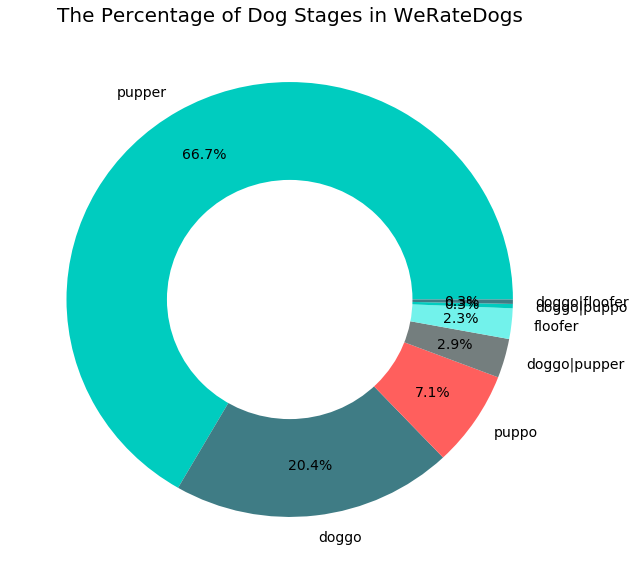

In [86]:
#      P I E   P L O T :
plt.figure(figsize=(10,10))
series = df['dog_stage'].value_counts() # data we need
pallete4 = ["#61B8A9","#67606F","#438B7E","#B0A48F"] 
labels = series.index # to set labels 
values = series.values # to set a values 
# colors

palette1 = ["#8BC1C2","#91B9A3"] # colour palette(1)

colors = ["#00CCBF","#3F7C85",'#FF5F5D','#747E7E' ,"#72F2EB"] 
  
# explosion

# Pie Chart
plt.pie(values, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.77, textprops={'fontsize': 14})
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('The Percentage of Dog Stages in WeRateDogs',fontsize = 20)
  
# Displaying Chart
plt.show()

##### Note: The pupper stage has the highest percentage with 66.7% where the (doggo|floofer) and (doggo|puppo) has the lowest precentage.

#### Insight (5) :  The Percentage of Different Sources of the Tweets at WeRateDogs

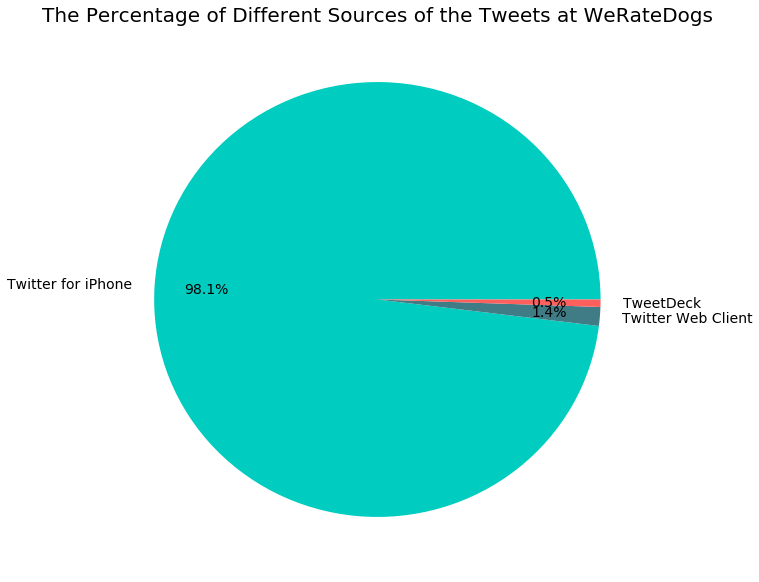

In [87]:
plt.figure(figsize=(10,10))
series2 = df['source'].value_counts() # data we need
pallete4 = ["#61B8A9","#67606F","#438B7E","#B0A48F"] 
labels = series2.index # to set labels 
values = series2.values # to set a values 
# colors

colors = ['#00CCBF',"#3F7C85",'#FF5F5D','#00CCBF' ,"#72F2EB"] 
 
# Pie Chart
plt.pie(values, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.77, textprops={'fontsize': 14})
  
# Adding Title of chart
plt.title('The Percentage of Different Sources of the Tweets at WeRateDogs',fontsize = 20)
  
# Displaying Chart
plt.show()